# IT3212 - Assignment 2

## Setup

In [94]:
import pandas as pd

filepath = '../data/disaster-tweets.csv'
df = pd.read_csv(filepath, encoding='ISO-8859-1')

## 1. Implement the preprocessing

### 1.1 Removing data

In [95]:
# Only keep the columns we need
original_features = [
  '_unit_id', '_golden', '_unit_state', '_trusted_judgments',
  '_last_judgment_at', 'choose_one', 'choose_one:confidence',
  'choose_one_gold', 'keyword', 'location', 'text', 'tweetid', 'userid'
  ]
features_to_keep = ['choose_one', 'choose_one:confidence', 'keyword', 'location', 'text']
df = df[features_to_keep]
display(df.head())

# Remove rows with a confidence score less than 1.0
confidence_threshold = 1.0
df = df[df['choose_one:confidence'] >= confidence_threshold]

# Write the updated dataframe to a new CSV file
df.to_csv('./results/01-remove-features.csv', index=False)

,choose_one,choose_one:confidence,keyword,location,text
0,Relevant,1.0000,NaN,NaN,Just happened a terrible car crash
1,Relevant,1.0000,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
2,Relevant,1.0000,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,Relevant,0.9603,NaN,NaN,"there is a forest fire at spot pond, geese are..."
4,Relevant,1.0000,NaN,NaN,Forest fire near La Ronge Sask. Canada


### 1.2 Text processing

In [96]:
from urllib.parse import unquote

# Clean `keyword` column.
def clean_keyword(keyword: str):
    return unquote(keyword) if pd.notnull(keyword) else ''

df['keyword'] = df['keyword'].apply(clean_keyword)

# Write the updated dataframe to a new CSV file
df.to_csv('./results/02-clean-keywords.csv', index=False)
# Print head of columns with a some defined keyword
df[df['keyword'] == 'earthquake'].head()


,choose_one,choose_one:confidence,keyword,location,text
4348,Relevant,1.0,earthquake,ARGENTINA,#Earthquake #Sismo M 1.4 - 4km E of Interlaken...
4349,Relevant,1.0,earthquake,Earth,1.43 earthquake occurred near Mount St. Helens...
4350,Relevant,1.0,earthquake,NaN,Contruction upgrading ferries to earthquake st...
4351,Relevant,1.0,earthquake,Sydney,#3Novices : Renison mine sees seismic event ht...
4353,Relevant,1.0,earthquake,NaN,2.0 #Earthquake in Sicily Italy #iPhone users ...


In [97]:
# Remove links from the `text` column
import string
import re


def clean_text(text: str):
  text = re.sub(r'https?://\S+', '', text)  # Remove link
  text = re.sub(r'\n', ' ', text)  # Remove line breaks
  # Remove leading, trailing, and extra spaces
  text = re.sub('\s+', ' ', text).strip()
  return text


df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

# Remove punctuation from the `text` column
df['cleaned_text'] = df['text'].apply(lambda x: x.translate(
    str.maketrans('', '', string.punctuation)))

# Write the updated dataframe to a new CSV file
df.to_csv('./results/03-clean-text.csv', index=False)
display(df.head())


,choose_one,choose_one:confidence,keyword,location,text,cleaned_text
0,Relevant,1.0,,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...


In [98]:
# Remove English stopwords
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Clean `text` column.
def clean_text(text: str):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df['cleaned_text'] = df['text'].apply(clean_text)

# Write the updated dataframe to a new CSV file
df.to_csv('./results/04-without-stopwords.csv', index=False)
display(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/magnusrodseth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,choose_one,choose_one:confidence,keyword,location,text,cleaned_text
0,Relevant,1.0,,NaN,Just happened a terrible car crash,happened terrible car crash
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,deeds reason #earthquake may allah forgive us
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...","heard #earthquake different cities, stay safe ..."
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,residents asked 'shelter place' notified offic...


In [99]:
# Lemmatizing the `text` column
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Clean `text` column.
def clean_text(text: str):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


df['cleaned_text'] = df['text'].apply(clean_text)

# Write the updated dataframe to a new CSV file
df.to_csv('./results/05-lemmatized.csv', index=False)
display(df.head())


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/magnusrodseth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,choose_one,choose_one:confidence,keyword,location,text,cleaned_text
0,Relevant,1.0,,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...","Heard about #earthquake is different cities, s..."
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,All resident asked to 'shelter in place' are b...


In [100]:
# Remove special characters
def clean_text(text: str):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Write the updated dataframe to a new CSV file
df.to_csv('./results/06-without-special-chars.csv', index=False)
display(df.head())

,choose_one,choose_one:confidence,keyword,location,text,cleaned_text
0,Relevant,1.0,,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...


### 1.3 Handling categorical data

In [101]:
# Remove rows with `choose_one` value of `Can't Decide`
df = df[df['choose_one'] != "Can't Decide"]

# Replace the `choose_one` column with a new column called `target`, where `Relevant` is `1` and `Not Relevant` is `0`
df['target'] = df['choose_one'].apply(lambda x: 1 if x == 'Relevant' else 0)

# Write the updated dataframe to a new CSV file
df.to_csv('./results/07-with-target-variable.csv', index=False)
display(df.head())

,choose_one,choose_one:confidence,keyword,location,text,cleaned_text,target
0,Relevant,1.0,,NaN,Just happened a terrible car crash,Just happened a terrible car crash,1
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,1
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,1
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,1
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,1


### 1.4 Duplicated data

In [102]:
# Remove duplicated rows with respect to the `text` column
df = df.drop_duplicates(subset=['text'])

# Write the updated dataframe to a new CSV file
df.to_csv('./results/08-without-duplicates-in-text.csv', index=False)
display(df.head())

,choose_one,choose_one:confidence,keyword,location,text,cleaned_text,target
0,Relevant,1.0,,NaN,Just happened a terrible car crash,Just happened a terrible car crash,1
1,Relevant,1.0,,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,1
2,Relevant,1.0,,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,1
4,Relevant,1.0,,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,1
5,Relevant,1.0,,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,1


## 2. Extracting features

> TODO: Extract features from the preprocessed data

## 3. Selecting features

> TODO: Select features from the extracted features

## 4. Implement basic modelling methods

In [103]:
from sklearn.model_selection import train_test_split

# Using TF-IDF Vectorizer for 'cleaned_text' column
# We convert textual information into numerical format which models can process and learn from
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['cleaned_text'])

# Assuming y is your target variable and X_text is your feature
y = df['target']

# Split data into training and test sets
# Assess how well the model generalizes to unseen data.
x_train, x_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)


### 4.1 Logistic regression

Accuracy: 0.9082998661311914
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       847
           1       0.93      0.86      0.89       647

    accuracy                           0.91      1494
   macro avg       0.91      0.90      0.91      1494
weighted avg       0.91      0.91      0.91      1494

Confusion Matrix: 
 [[803  44]
 [ 93 554]]


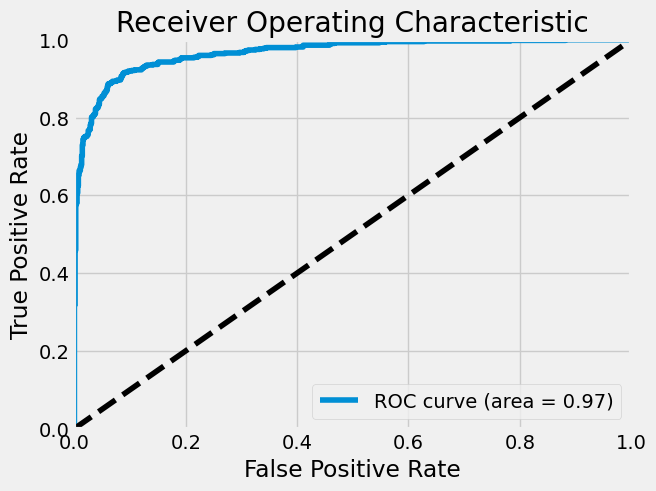

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize Logistic Regression Model
logreg = LogisticRegression(random_state=42)

# Fit the model
logreg.fit(x_train, y_train)

# Predictions
y_pred = logreg.predict(x_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification Report
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Confusion Matrix
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")

# Compute ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:, 1])
# AUC (Area Under Curve) score represents the ability of the model to distinguish between the positive and negative class: 
# 1 is perfect, 0.5 is random, and 0 is perfectly wrong.
area_under_curve_for_roc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % area_under_curve_for_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 4.2 Support Vector Machines

Accuracy: 0.9089692101740294
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       847
           1       0.92      0.86      0.89       647

    accuracy                           0.91      1494
   macro avg       0.91      0.90      0.91      1494
weighted avg       0.91      0.91      0.91      1494

Confusion Matrix: 
 [[799  48]
 [ 88 559]]


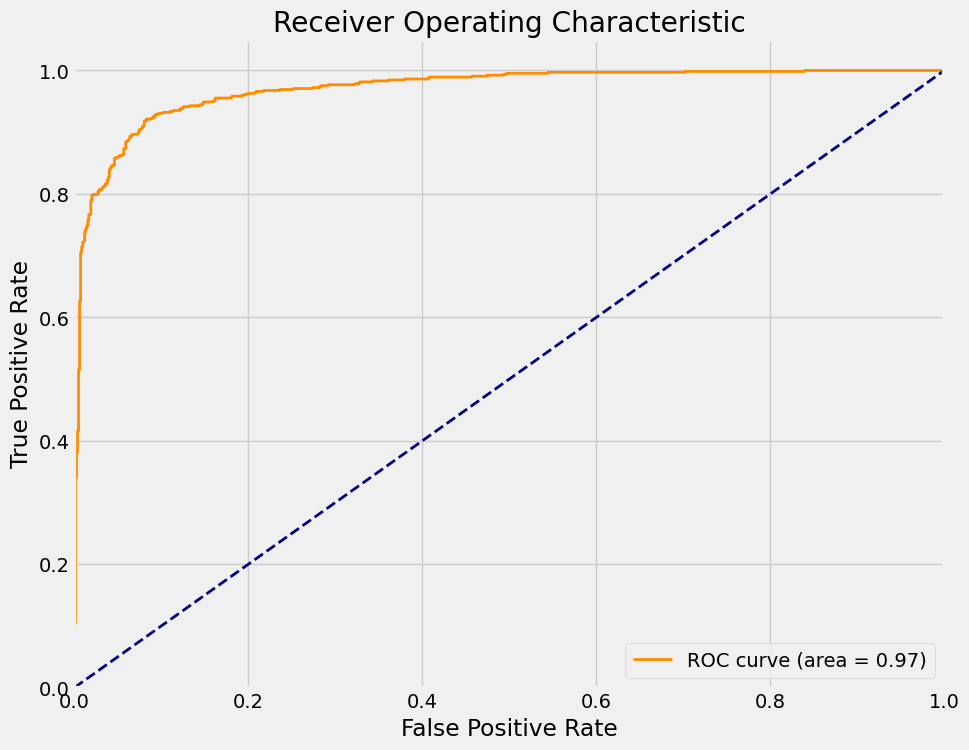

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42, probability=True)

# Fit the model
svm_model.fit(x_train, y_train)

# Predictions
y_pred = svm_model.predict(x_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")

# Predict probabilities
y_prob = svm_model.predict_proba(x_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()